# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.644721e+01     1.563340e+01
 * time: 0.001817941665649414
     1     3.528752e+01     8.580716e+00
 * time: 0.005580902099609375
     2     2.562305e+01     2.750269e+00
 * time: 0.011916875839233398
     3     2.343478e+01     4.558876e+00
 * time: 0.017358779907226562
     4     2.072099e+01     2.666954e+00
 * time: 0.0218658447265625
     5     1.909884e+01     1.773829e+00
 * time: 0.026395797729492188
     6     1.890884e+01     2.455990e+00
 * time: 0.031024932861328125
     7     1.863253e+01     2.069549e+00
 * time: 0.0355989933013916
     8     1.831666e+01     1.561020e+00
 * time: 0.040248870849609375
     9     1.799801e+01     9.210144e-01
 * time: 0.04484295845031738
    10     1.782196e+01     9.876091e-01
 * time: 0.049429893493652344
    11     1.772840e+01     7.243123e-01
 * time: 0.053978919982910156
    12     1.772552e+01     1.033450e+00
 * time: 0.05764293670654297
    13     1.765813e+01     8.800249e-01
 

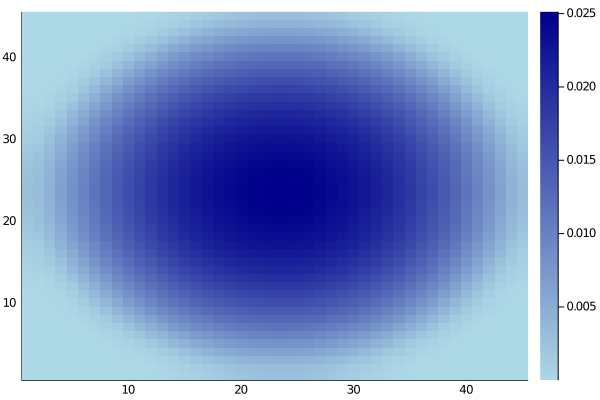

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)